# 프로젝토 : 가위바위보 분류기 만들기

## 데이터 준비하기

### 데이터 만들기
- 구글 teachable machine 사이트를 이용해 가위바위보 이미지 데이터를 만든다.
- URL : https://teachablemachine.withgoogle.com/

### 디렉토리
- 파일을 저장할 디렉토리를 생성한다

In [95]:
# 디렉토리 만들기
# mkdir - p

In [96]:
# train_data 디렉토리
# ~/aiffel/exploration/E01/train_data/rock
# ~/aiffel/exploration/E01/train_data/scissors
# ~/aiffel/exploration/E01/train_data/paper

### 이미지 업로드 및 압축해제

## 이미지 사이즈 조절

In [97]:
# PIL(pillow) 라이브러리 사용
from PIL import Image
import os, glob
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [107]:
def resize_images(img_path):
    # glob.glob : 모든 jpg 파일을 읽어온다.
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 이미지 사이즈를 모두 28x28 로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [130]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이고,
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data/scissors_test"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

599  images to be resized.
599  images resized.
가위 이미지 resize 완료!


In [131]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이고,
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data/rock_test"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

599  images to be resized.
599  images resized.
바위 이미지 resize 완료


In [133]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이고
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data/paper_test"
resize_images(image_dir_path)

print("보 이미지 resize 완료")

599  images to be resized.
599  images resized.
보 이미지 resize 완료


## train data 불러오기

In [134]:
import numpy as np

def load_data(img_path, number_of_data=1797):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path +'/scissors_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1797 입니다.
x_train shape: (1797, 28, 28, 3)
y_train shape: (1797,)


라벨:  0


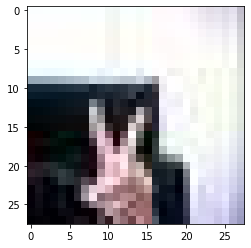

In [135]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네크워크 설계하기

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model 생성
model = keras.models.Sequential()

# 28x28 pixel의 컬러 이미지 파일에 대해 32개의 이미지 특징을 고려함
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

# 첫번째 이미지 특징 저장한 이후 64개의 이미지 특징을 고려함
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

# 분류기의 알고리즘 복잡도 설정
model.add(keras.layers.Dense(64, activation="relu"))

# 총 클래스의 개수 가위,바위,보 = 3가지
model.add(keras.layers.Dense(3, activation="softmax"))

model.summary()

## 딥러닝 네크워크 학습시키기

In [114]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# 분류기의 학습횟수 설정
model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
10/10 [==============================] - 0s 4ms/step - loss: 1.0992 - accuracy: 0.3901
Epoch 2/15
10/10 [==============================] - 0s 4ms/step - loss: 0.9071 - accuracy: 0.6037
Epoch 3/15
10/10 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.8014
Epoch 4/15
10/10 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.7790
Epoch 5/15
10/10 [==============================] - 0s 4ms/step - loss: 0.2821 - accuracy: 0.9069
Epoch 6/15
10/10 [==============================] - 0s 4ms/step - loss: 0.2194 - accuracy: 0.9155
Epoch 7/15
10/10 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.9268
Epoch 8/15
10/10 [==============================] - 0s 4ms/step - loss: 0.1668 - accuracy: 0.9309
Epoch 9/15
10/10 [==============================] - 0s 4ms/step - loss: 0.1890 - accuracy: 0.9133
Epoch 10/15
10/10 [==============================] - 0s 4ms/step - loss: 0.1124 - accuracy: 0.9772
Epoch 11/15
10/10 [

## 테스트 데이터 만들기

In [115]:
def resize_images(img_path):
    # glob.glob : 모든 jpg 파일을 읽어온다.
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 이미지 사이즈를 모두 28x28 로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [123]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이고,
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data/scissors_test"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

599  images to be resized.
599  images resized.
가위 이미지 resize 완료!


In [124]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이고,
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data/rock_test"
resize_images(image_dir_path)

print("바위 이미지 resize 완료")

599  images to be resized.
599  images resized.
바위 이미지 resize 완료


In [125]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이고
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data/paper_test"
resize_images(image_dir_path)

print("보 이미지 resize 완료")

599  images to be resized.
599  images resized.
보 이미지 resize 완료


In [126]:
import numpy as np

def load_data(img_path, number_of_data=1797):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path +'/scissors_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/exploration/E01/test_data"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터(x_test)의 이미지 개수는 1797 입니다.
x_test shape: (1797, 28, 28, 3)
y_test shape: (1797,)


라벨:  0


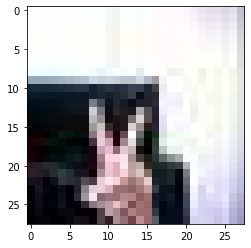

In [127]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [128]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

57/57 - 0s - loss: 7.0029 - accuracy: 0.4452
test_loss: 7.002909183502197 
test_accuracy: 0.44518643617630005
